# CEEL82B Expt 4: Statistical Analysis

### Objective: 
Perform statistical data analysis such as: 
* Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation), 
* Main distributions ( Normal distribution, chi-square distribution), 
* Hypothesis testing,  
* pair-wise association (Pearson correlation test, t-test, ANOVA), 
* Non-parametric test (Spearman rank etc)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive

/content/drive/MyDrive


In [68]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, probplot, spearmanr, chi2_contingency, f_oneway
import pylab as py
%matplotlib inline

In [9]:
df = pd.read_csv("Height_of_Male_and_Female_by_Country_2022.csv").drop(['Rank', 'Country Name', 'Male Height in Ft',	'Female Height in Ft'],axis='columns')
df.head()

,Male Height in Cm,Female Height in Cm
0,183.78,170.36
1,183.30,169.96
2,182.79,168.66
3,182.47,167.47
4,182.10,168.91


In [10]:
df.describe()

,Male Height in Cm,Female Height in Cm
count,199.000000,199.000000
mean,173.089045,160.942915
std,4.949832,4.076377
min,160.130000,150.910000
25%,169.490000,158.240000
50%,173.530000,160.620000
75%,176.510000,163.870000
max,183.780000,170.360000


### Descriptive Statistics

In [22]:
describe = pd.DataFrame({"mode": df.mode().iloc[0,:],"median": df.median(), "variance": df.var()})
statistics = describe.T
statistics.rename(columns = {0:'Male Height in Cm', 1:'Female Height in Cm', 2:'Male Height in Ft', 3:'Female Height in Ft'}, inplace = True)
statistics.append(df.describe())

,Male Height in Cm,Female Height in Cm
mode,170.670000,154.760000
median,173.530000,160.620000
variance,24.500839,16.616847
count,199.000000,199.000000
mean,173.089045,160.942915
std,4.949832,4.076377
min,160.130000,150.910000
25%,169.490000,158.240000
50%,173.530000,160.620000
75%,176.510000,163.870000


#### Correlation Matrix

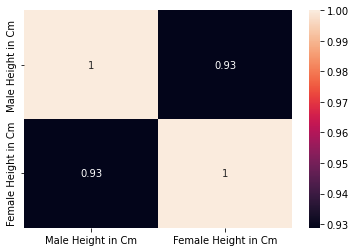

In [23]:
sns.heatmap(df.corr(), annot=True)

We note that there is a correlation between the female height and male height

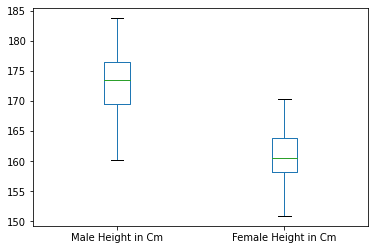

In [60]:
df.boxplot(grid=False)

We note that there's no outliers in the dataset

#### Covariance Matrix

In [34]:
df.cov()

,Male Height in Cm,Female Height in Cm
Male Height in Cm,24.500839,18.740491
Female Height in Cm,18.740491,16.616847


### Histogram plot

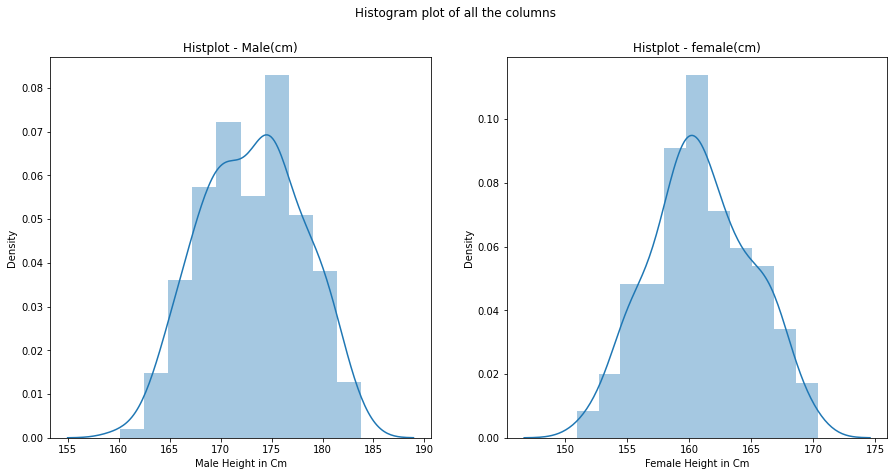

In [25]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Histogram plot of all the columns')
axes[0].set_title('Histplot - Male(cm)')
axes[1].set_title('Histplot - female(cm)')

sns.distplot(df["Male Height in Cm"], ax=axes[0])
sns.distplot(df["Female Height in Cm"], ax=axes[1])
plt.show()

Skewness

In [26]:
df.skew(axis = 0, skipna = True)

Male Height in Cm     -0.046390
Female Height in Cm    0.044913
dtype: float64

Kurtosis

In [27]:
df.kurt(axis = 0, skipna = True)

Male Height in Cm     -0.694627
Female Height in Cm   -0.547154
dtype: float64

As observed in the plots above, female height is having a lesser magnitude of skewness, and is more normal than male height

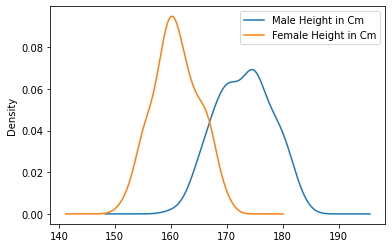

In [28]:
df.plot.kde()

### Normality Testing

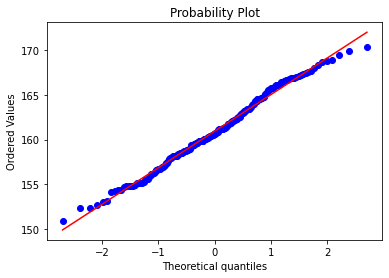

In [39]:
probplot(df['Female Height in Cm'].to_numpy(), dist="norm", plot=pylab)
pylab.show()

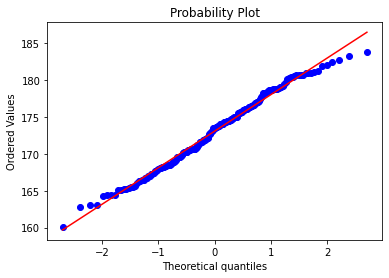

In [40]:
probplot(df['Male Height in Cm'].to_numpy(), dist="norm", plot=pylab)
pylab.show()

Therefore, by the two Normality tests, both our columns are more or less having a normal distribution

### Chi squared test for independence of variables
assumption : level of significance = 0.05

In [43]:
alpha = 0.05

In [44]:
stat, p, dof, expected = chi2_contingency(df)
# Hypothesis: Variables are independent

# interpret p-value
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


Hence the two columns are independent

### Pearson Correlation test

In [49]:
corr, _ = pearsonr(df['Female Height in Cm'], df['Male Height in Cm'])
print(f'Pearsons correlation: {corr}' )

Pearsons correlation: 0.9287870871295011


This shows that the male and female height variables are higly correlated (92.87%)

### Spearman Correlation test

In [51]:
rho, p = spearmanr(df['Female Height in Cm'], df['Male Height in Cm'])
print(f'Spearman correlation: {rho}, with p value: {p}')

Spearman correlation: 0.9316471801098678, with p value: 1.4858353024204657e-88


This also shows that the 2 variables are highly correlated (93%) with a very small p-value of the order of 10^(-88) 

## Hypothesis Testing

### Test: Females are as tall as the Males
Null Hypothesis

* H0: μ1=μ2 (Females are as tall as Males)
* H1: μ1≠μ2 (Females are not as tall as Males)

### 2 samples T-Test
Following are the assumptions on which the T-test can be applied:
1. Independence of the observations: Each subject should belong to only one group. There is no relationship between the observations in each group.
2. No significant outliers in the two groups
3. Normality: the data for each group should be approximately normally distributed.
4. Homogeneity of variances: the variance of the outcome variable should be equal in each group.

In [48]:
statistic, p_value = ttest_ind(df['Female Height in Cm'], df['Male Height in Cm'], equal_var=False)

if p_value <= alpha:
  print(f"H1: Females are not as tall as Males, p: {p_value}")
else:
  print(f"H0: Females are as tall as Males, p: {p_value}")

H1: Females are not as tall as Males, p: 1.8916856132584915e-89


Since the p value is very very small, we say reject the Null Hypothesis, and accept H1

### ANOVA test

Thre are certain assumptions we need to make before performing ANOVA:

1. The observations are obtained independently and randomly from the population defined by the factor levels
2. The data for each factor level is normally distributed
3. Independence of cases: the sample cases should be independent of each other
4. Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal


Null Hypothesis

H0: μ1=μ2 (Females are as tall as Males)

H1: μ1≠μ2 (Females are not as tall as Males)

In [70]:
statistic, p_value = f_oneway(df['Female Height in Cm'], df['Male Height in Cm'])

if p_value <= alpha:
  print(f"H1: Females are not as tall as Males, p: {p_value}")
else:
  print(f"H0: Females are as tall as Males, p: {p_value}")

H1: Females are not as tall as Males, p: 1.1680388181100532e-90


### Conclusion:
1. Explored the heights dataset, with male and female heights. Assumed that females are as tall as the males, and got a very small p value using multiple methods reinforcing the fact that females are shorter on average than males.
2. Checked the data for normality and found both the male and female height distributions to be more or less normal. Further, applied the chi square test on independence of variables and found both of the columns to be independent.
3. In spite of being independent, found that both the columns are much highly correlated, as found by spearman and pearson coefficients almost reaching 1. 
4. After establishing the normality, and showing that it has no outliers, etc. checking all the pre-requisites for applying hypothesis testing; applied two different techniques to further prove beyond doubt that the null hypothesis is wrong, using both ANOVA and T-test, and got an extremely small p-value.